<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [147]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [148]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [149]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [150]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [151]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [152]:
import pandas as pd

In [153]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [154]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [155]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [157]:
column_1 = S_value.sample(10, axis=1)

In [158]:
column_1

,5,79,57,14,64,32,52,27,78,80
0,996.635104,213.349499,287.093060,983.455162,246.072560,791.646533,338.248630,886.257221,214.381596,212.410308
1,998.080244,629.006640,876.880959,995.241106,813.746547,978.958486,910.871003,985.764100,642.331367,615.703423
2,863.488913,202.845900,202.845900,212.804020,202.845900,202.846629,202.845900,202.856149,202.845900,202.845900
3,939.894141,202.845900,202.845900,251.692930,202.845900,202.872134,202.845906,203.056575,202.845900,202.845900
4,972.619827,202.845900,202.846100,397.333609,202.845921,203.434102,202.846887,205.756389,202.845900,202.845900
...,...,...,...,...,...,...,...,...,...,...
995,996.621062,213.033740,285.224976,983.299828,245.001506,788.624964,335.544096,884.583821,214.038916,212.119371
996,996.844822,219.629820,321.523685,985.676166,266.394678,834.702817,386.568314,909.552295,221.176381,218.214866
997,979.550980,202.845902,202.847328,506.933724,202.846094,204.621186,202.851837,210.256735,202.845903,202.845902
998,941.000931,202.845900,202.845900,253.390152,202.845900,202.874213,202.845907,203.070577,202.845900,202.845900


In [159]:
col_2 = list(column_1.columns.values)

In [160]:
col_3 = []
for i in col_2:
  col_3.append(i+1)

In [161]:
col_3

[6, 80, 58, 15, 65, 33, 53, 28, 79, 81]

In [162]:
df1 = pd.concat([S_value, S_value[col_2].T.stack().reset_index(name='new')['new']], axis=1)

In [163]:
Df1 = pd.concat([S_value, S_value[col_3].T.stack().reset_index(name='new')['new']], axis=1)

In [164]:
df1["new"].head(1001)

0       996.635104
1       998.080244
2       863.488913
3       939.894141
4       972.619827
           ...    
996     996.844822
997     979.550980
998     941.000931
999     972.502284
1000    213.349499
Name: new, Length: 1001, dtype: float64

In [165]:
df2 = pd.concat([I_value, I_value[col_2].T.stack().reset_index(name='new')['new']], axis=1)

In [166]:
Df2 = pd.concat([I_value, I_value[col_2].T.stack().reset_index(name='new')['new']], axis=1)

In [167]:
df2["new"]

0       2.179861e+00
1       1.459206e+00
2       6.362423e+01
3       2.961210e+01
4       1.399943e+01
            ...     
9995    1.307784e+01
9996    2.114785e+01
9997    2.980625e-06
9998   -4.323450e-10
9999    1.817447e-07
Name: new, Length: 10000, dtype: float64

In [168]:
df3 = pd.concat([R_value, R_value[col_2].T.stack().reset_index(name='new')['new']], axis=1)

In [169]:
Df3 = pd.concat([R_value, R_value[col_2].T.stack().reset_index(name='new')['new']], axis=1)

In [170]:
df3["new"]

0         1.185035
1         0.460550
2        72.886859
3        30.493763
4        13.380748
           ...    
9995    774.802793
9996    760.637286
9997    797.154095
9998    797.154100
9999    797.154100
Name: new, Length: 10000, dtype: float64

In [171]:
data = pd.DataFrame(df1["new"])

In [173]:
data["suspectible"] = data["new"]

In [174]:
data["infected"] = df2["new"]

In [175]:
data["recovered"] = df3["new"]

In [176]:
data.drop("new",axis = 1,inplace = True)

In [177]:
data

,suspectible,infected,recovered
0,996.635104,2.179861e+00,1.185035
1,998.080244,1.459206e+00,0.460550
2,863.488913,6.362423e+01,72.886859
3,939.894141,2.961210e+01,30.493763
4,972.619827,1.399943e+01,13.380748
...,...,...,...
9995,212.119371,1.307784e+01,774.802793
9996,218.214866,2.114785e+01,760.637286
9997,202.845902,2.980625e-06,797.154095
9998,202.845900,-4.323450e-10,797.154100


In [178]:
#df4 = pd.DataFrame(beta)

In [179]:
#df5 = pd.DataFrame(gamma)

In [180]:
#df4[0]

In [181]:
#df4[1] = df4[0]
#df4[2] = df4[0]
#df4[3] = df4[0]
#df4[4] = df4[0]
#df4[5] = df4[0]
#df4[6] = df4[0]
#df4[7] = df4[0]
#df4[8] = df4[0]
#df4[9] = df4[0]


In [182]:
#df5[1] = df5[0]
#df5[2] = df5[0]
#df5[3] = df5[0]
#df5[4] = df5[0]
#df5[5] = df5[0]
#df5[6] = df5[0]
#df5[7] = df5[0]
#df5[8] = df5[0]
#df5[9] = df5[0]


In [183]:
#df4

In [184]:
#df4 = pd.concat([df4, df4.T.stack().reset_index(name='new')['new']], axis=1)

In [185]:
#df5 = pd.concat([df5, df5.T.stack().reset_index(name='new')['new']], axis=1)

In [186]:
#data["beta"] = df4["new"]

In [187]:
#data["gamma"] = df5["new"]

In [188]:
data

,suspectible,infected,recovered
0,996.635104,2.179861e+00,1.185035
1,998.080244,1.459206e+00,0.460550
2,863.488913,6.362423e+01,72.886859
3,939.894141,2.961210e+01,30.493763
4,972.619827,1.399943e+01,13.380748
...,...,...,...
9995,212.119371,1.307784e+01,774.802793
9996,218.214866,2.114785e+01,760.637286
9997,202.845902,2.980625e-06,797.154095
9998,202.845900,-4.323450e-10,797.154100


In [189]:
data["recovered(O)"] = Df3["new"]

In [190]:
data["infected(O)"] = Df2["new"]

In [191]:
data["suspectible(O)"] = Df1["new"]

In [192]:
data

,suspectible,infected,recovered,recovered(O),infected(O),suspectible(O)
0,996.635104,2.179861e+00,1.185035,1.185035,2.179861e+00,995.899765
1,998.080244,1.459206e+00,0.460550,0.460550,1.459206e+00,997.850946
2,863.488913,6.362423e+01,72.886859,72.886859,6.362423e+01,740.834939
3,939.894141,2.961210e+01,30.493763,30.493763,2.961210e+01,888.069472
4,972.619827,1.399943e+01,13.380748,13.380748,1.399943e+01,953.793977
...,...,...,...,...,...,...
9995,212.119371,1.307784e+01,774.802793,774.802793,1.307784e+01,211.287522
9996,218.214866,2.114785e+01,760.637286,760.637286,2.114785e+01,216.920167
9997,202.845902,2.980625e-06,797.154095,797.154095,2.980625e-06,202.845901
9998,202.845900,-4.323450e-10,797.154100,797.154100,-4.323450e-10,202.845900


In [193]:
X = data[["suspectible","infected","recovered"]]
y = data[["recovered(O)","infected(O)","suspectible(O)"]]

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)
#model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 00001: val_accuracy improved from -inf to 0.25938, saving model to weights-improvement-01-0.26.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.25938

Epoch 00003: val_accuracy did not improve from 0.25938

Epoch 00004: val_accuracy did not improve from 0.25938

Epoch 00005: val_accuracy did not improve from 0.25938

Epoch 00006: val_accuracy did not improve from 0.25938

Epoch 00007: val_accuracy did not improve from 0.25938

Epoch 00008: val_accuracy did not improve from 0.25938

Epoch 00009: val_accuracy did not improve from 0.25938

Epoch 00010: val_accuracy did not improve from 0.25938

Epoch 00011: val_accuracy did not improve from 0.25938

Epoch 00012: val_accuracy did not improve from 0.25938

Epoch 00013: val_accuracy did not improve from 0.25938

Epoch 00014: val_accuracy did not improve from 0.25938

Epoch 00015: val_accuracy did not improve from 0.25938

Epoch 00016: val_accuracy did not improve from 0.25938

Epoch 00017: val_accuracy did not improve from 0.25938

Epoch 00018: val_accuracy did not improve from 0.25938

Epoch 00019: val_accuracy did not improve from 

In [197]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 20us/step
Accuracy: 99.90


In [199]:
data

,suspectible,infected,recovered,recovered(O),infected(O),suspectible(O)
0,996.635104,2.179861e+00,1.185035,1.185035,2.179861e+00,995.899765
1,998.080244,1.459206e+00,0.460550,0.460550,1.459206e+00,997.850946
2,863.488913,6.362423e+01,72.886859,72.886859,6.362423e+01,740.834939
3,939.894141,2.961210e+01,30.493763,30.493763,2.961210e+01,888.069472
4,972.619827,1.399943e+01,13.380748,13.380748,1.399943e+01,953.793977
...,...,...,...,...,...,...
9995,212.119371,1.307784e+01,774.802793,774.802793,1.307784e+01,211.287522
9996,218.214866,2.114785e+01,760.637286,760.637286,2.114785e+01,216.920167
9997,202.845902,2.980625e-06,797.154095,797.154095,2.980625e-06,202.845901
9998,202.845900,-4.323450e-10,797.154100,797.154100,-4.323450e-10,202.845900


In [200]:
S_pred = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["suspectible"][p])
    p = p+1000
    q = q+1
  S_pred.append(g)     # S is a list of 1000 elements and further each elements is a list of 10 elements

  



In [201]:
I_pred = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["infected"][p])
    p = p+1000
    q = q+1
  I_pred.append(g)     # I is a list of 1000 elements and further each elements is a list of 10 elements

  



In [202]:
R_pred = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["recovered"][p])
    p = p+1000
    q = q+1
  R_pred.append(g)     # I is a list of 1000 elements and further each elements is a list of 10 elements

  



In [203]:
S_act = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["suspectible(O)"][p])
    p = p+1000
    q = q+1
  S_act.append(g)     # S is a list of 1000 elements and further each elements is a list of 10 elements

  



In [204]:
I_act = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["infected(O)"][p])
    p = p+1000
    q = q+1
  I_act.append(g)     # I is a list of 1000 elements and further each elements is a list of 10 elements

  



In [205]:
R_act = []
for i in range(1000):
  g = []
  q = 1
  p = i
  while q<=10:
    g.append(data["recovered(O)"][p])
    p = p+1000
    q = q+1
  R_act.append(g)     # I is a list of 1000 elements and further each elements is a list of 10 elements

  



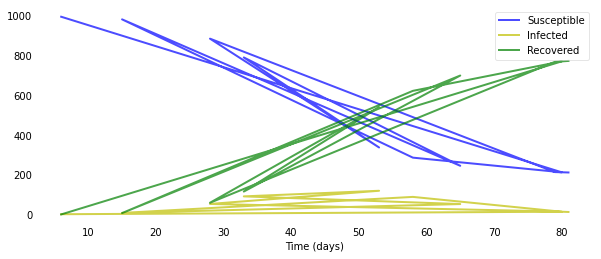

In [213]:
plotsir(col_3, S_pred[0], I_pred[0], R_pred[0])  # plot of S,I,R (predicted) vs 10 random days for a particular parameter( beta and gamma)